## Import essential libraries

In [18]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

#from keras.applications.vgg16 import VGG16

from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [19]:
# re-size all the images to this

IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/Train'
valid_path = '/content/drive/MyDrive/Datasets/Test'

In [3]:
# Import the Resnet 50 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [20]:
# don't train existing weights

for layer in resnet.layers:
    layer.trainable = False

In [6]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
#path /content/drive/MyDrive/Datasets/Train

In [8]:
# useful for getting number of output classes

folders = glob('/content/drive/MyDrive/Datasets/Train/*')

In [9]:
# our layers - you can add more if you want

x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
# view the structure of the model

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [15]:

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 1s 780ms/step - loss: 3.2177 - accuracy: 0.5156 - val_loss: 3.2533 - val_accuracy: 0.3448
Epoch 2/50
2/2 [==============================] - 1s 651ms/step - loss: 4.4789 - accuracy: 0.4219 - val_loss: 2.4577 - val_accuracy: 0.5517
Epoch 3/50
2/2 [==============================] - 1s 644ms/step - loss: 2.8362 - accuracy: 0.4844 - val_loss: 1.1057 - val_accuracy: 0.5345
Epoch 4/50
2/2 [==============================] - 1s 630ms/step - loss: 1.1801 - accuracy: 0.5938 - val_loss: 4.1179 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 1s 647ms/step - loss: 2.3050 - accuracy: 0.4219 - val_loss: 1.3241 - val_accuracy: 0.5517
Epoch 6/50
2/2 [==============================] - 1s 639ms/step - loss: 1.1750 - accuracy: 0.5938 - val_loss: 1.7281 - val_accuracy: 0.5517
Epoch 7/50
2/2 [==============================] - 1s 634ms/step - loss: 1.9494 - accuracy: 0.5312 - val_loss: 1.4344 - val_accuracy: 0.5345
Epoch 8/50
2/2 [====

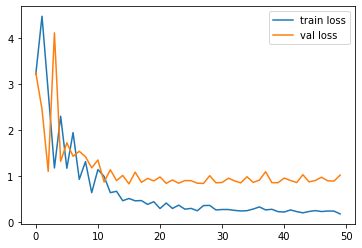

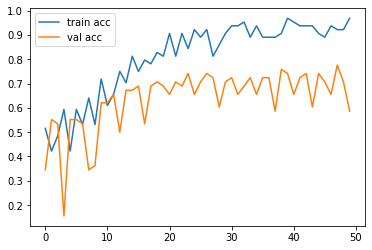

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
